## Natural Language Processing

### Project : Fake News Detection

At the end of the project, the code will accept any user given text as input and will provide an estimate whether it's real or fake

we break the notebook into seperate steps :
* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Creating Wordcloud Visuals
* [Step 2](#step2): Cleaning and Preprocessing
* [Step 3](#step3): Applying NLP Techniques
* [Step 4](#step4): Using Classification Models
* [Step 5](#step5): Creating Pipeline
* [Step 6](#step6): Predictions

---
<a id='step0'></a>
## Step 0 : Import Datasets



- dataset with label '0' as fake news and '1' as real news 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
# Importing useful libraries
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt #plotting
%matplotlib inline
import seaborn as sns #plotting
import numpy as np # linear algebra
import pandas as pd #data processing
import nltk #text preprocessing

In [3]:
import io
data=pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
print(data.shape)

(20800, 5)


In [5]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# Checking if there any null value or not
print(data.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [8]:
# Replacing null value with space (' ')
data=data.fillna(' ')
# Creating a new column, that will contain title of news, author name and the complete news
data['total']=data['title']+' '+data['author']+' '+data['text']

<a id='step1'></a>
## Step 1: Creating WordCloud Visuals

In [9]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data[data['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in data[data['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

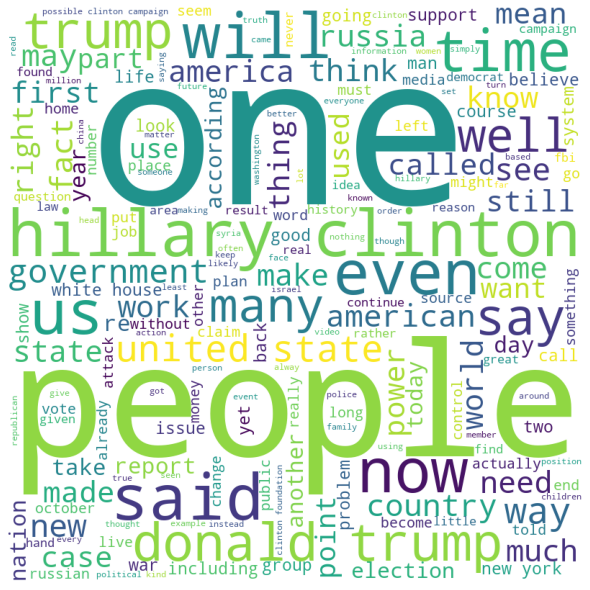

In [10]:
# Generating WordClouds for real words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

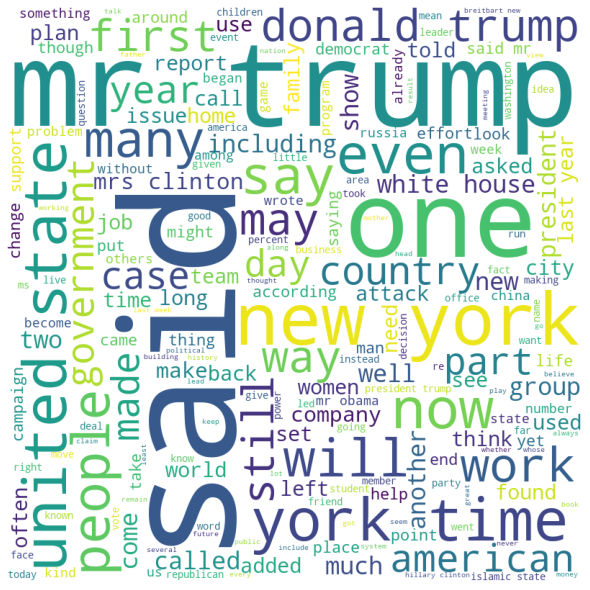

In [11]:
# Generating WordClouds for fake words
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<a id='step2'></a>
## Step 2 : Cleaning and preprocessing 

In [12]:
#Downloading nltk data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re  # Regex for removing punctuations
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer   #Lemmetizer for converting words to their dictionary form
lemmatizer=WordNetLemmatizer()
for index,row in data.iterrows():
    filter_sentence = ''
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning (removal of punctuation)
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    data.loc[index,'total'] = filter_sentence


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [13]:
data = data[['total','label']]

<a id='step3'></a>
## Step 3 : Applying NLP Techniques (converting text data to numeric data)

In [14]:
# Importing libraries for calculating word count, inverse document frequency and Tf-idf scores
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
X_Data = data['total']
Y_Data = data['label']

In [15]:
#Feature extraction using CountVectorizer and TfidfTransformer.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_Data)
freq_term_matrix = count_vectorizer.transform(X_Data) # obtain frequency of words in data and represent as matrix
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [16]:
tf_idf_matrix

<20800x210578 sparse matrix of type '<class 'numpy.float64'>'
	with 5990653 stored elements in Compressed Sparse Row format>

In [17]:
# function to get the feature array
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features  #max features based on Tfidf scores                
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

<a id='step4'></a>
## Step 4 : Using Classification Models

### Confusion Matrix

In [23]:
# Plotting confusion matrix
import pylab as pl
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_Data, random_state=0)

In [25]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity/recall: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')


### Logistic Regression

Accuracy of Logistic Regression on training set: 1.00
Accuracy of Logistic Regression on test set: 0.98
True Positives: 2596
True Negatives: 2501
False Positives: 63
False Negatives: 40
--------------------------------------------------
Accuracy: 0.98
Mis-Classification: 0.02
Sensitivity/recall: 0.98
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.98
Confusion matrix, without normalization
[[2501   63]
 [  40 2596]]


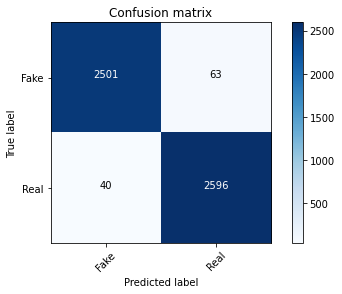

In [26]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(C=1e5)
Lr.fit(X_train, y_train)
pred = Lr.predict(X_test)
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(Lr.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(Lr.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
confusion_metrics(cm)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Fake','Real'], normalize= False, title='Confusion matrix')

### MultinomialNB

Accuracy of NB  classifier on training set: 0.89
Accuracy of NB classifier on test set: 0.84
True Positives: 1833
True Negatives: 2557
False Positives: 7
False Negatives: 803
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity/recall: 0.7
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.82
Confusion matrix, without normalization
[[2557    7]
 [ 803 1833]]


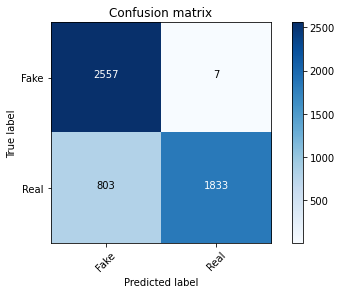

In [27]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm_NB = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
confusion_metrics(cm_NB)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_NB, classes=['Fake','Real'], normalize= False, title='Confusion matrix')

<a id='step5'></a>
## Step 5 : Creating Pipeline

In [28]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train, X_test, y_train, y_test = train_test_split(data['total'], data['label'], random_state=0)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [31]:
# Creating Pipeline
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [32]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1

In [33]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0])

In [35]:
#saving the pipeline
from google.colab import drive
drive.mount('/content/gdrive')
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

Mounted at /content/gdrive


['pipeline.sav']

In [38]:
filename = '/content/pipeline.sav'

<a id='step6'></a>
## Step 6 : Prediction

In [40]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
if result == [0] :
  print('Fake News')
else :
  print('Real News')

Fake News
